In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

Using plaidml.keras.backend backend.


In [3]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
df_pre = pd.read_csv('../dataset/wine.csv', header=None)

In [5]:
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [6]:
# 모델 설정
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
import os
MODEL_DIR = '../model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [15]:
modelpath = MODEL_DIR + 'fianl{epoch:03d}-{val_loss:.4f}.hdf5'

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [16]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [17]:
history =model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, verbose=1, callbacks=[early_stopping_callback, checkpointer_callback])

Train on 4352 samples, validate on 2145 samples
Epoch 1/3500
 500/4352 [==>...........................] - ETA: 2s - loss: 3.6211 - accuracy: 0.7480
Epoch 00001: val_loss improved from inf to 2.18106, saving model to ../model/fianl001-2.1811.hdf5
4352/4352 [==============================] - 0s 90us/sample - loss: 2.7981 - accuracy: 0.7516 - val_loss: 2.1811 - val_accuracy: 0.7585
Epoch 2/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 2.3683 - accuracy: 0.7340
Epoch 00002: val_loss improved from 2.18106 to 1.25395, saving model to ../model/fianl002-1.2539.hdf5
4352/4352 [==============================] - 0s 48us/sample - loss: 1.7934 - accuracy: 0.7523 - val_loss: 1.2539 - val_accuracy: 0.7613
Epoch 3/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 1.2476 - accuracy: 0.7540
Epoch 00003: val_loss improved from 1.25395 to 0.56431, saving model to ../model/fianl003-0.5643.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.8957 - ac

 500/4352 [==>...........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.9460
Epoch 00025: val_loss improved from 0.20655 to 0.20374, saving model to ../model/fianl025-0.2037.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.2052 - accuracy: 0.9386 - val_loss: 0.2037 - val_accuracy: 0.9389
Epoch 26/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1588 - accuracy: 0.9600
Epoch 00026: val_loss improved from 0.20374 to 0.20177, saving model to ../model/fianl026-0.2018.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.2023 - accuracy: 0.9391 - val_loss: 0.2018 - val_accuracy: 0.9385
Epoch 27/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1997 - accuracy: 0.9400
Epoch 00027: val_loss improved from 0.20177 to 0.20116, saving model to ../model/fianl027-0.2012.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.2010 - accuracy: 0.9370 - val_loss: 0.2012 - val_accuracy: 0.9361


Epoch 50/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1598 - accuracy: 0.9440
Epoch 00050: val_loss improved from 0.17182 to 0.17043, saving model to ../model/fianl050-0.1704.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.1673 - accuracy: 0.9435 - val_loss: 0.1704 - val_accuracy: 0.9436
Epoch 51/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1655 - accuracy: 0.9400
Epoch 00051: val_loss improved from 0.17043 to 0.16909, saving model to ../model/fianl051-0.1691.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.1662 - accuracy: 0.9444 - val_loss: 0.1691 - val_accuracy: 0.9431
Epoch 52/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1678 - accuracy: 0.9440
Epoch 00052: val_loss improved from 0.16909 to 0.16889, saving model to ../model/fianl052-0.1689.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.1645 - accuracy: 0.9446 - val_loss: 0.1689 - val_acc

4352/4352 [==============================] - 0s 7us/sample - loss: 0.1408 - accuracy: 0.9513 - val_loss: 0.1464 - val_accuracy: 0.9473
Epoch 76/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1603 - accuracy: 0.9440
Epoch 00076: val_loss improved from 0.14642 to 0.14609, saving model to ../model/fianl076-0.1461.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.1396 - accuracy: 0.9517 - val_loss: 0.1461 - val_accuracy: 0.9501
Epoch 77/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1691 - accuracy: 0.9460
Epoch 00077: val_loss improved from 0.14609 to 0.14457, saving model to ../model/fianl077-0.1446.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.1387 - accuracy: 0.9524 - val_loss: 0.1446 - val_accuracy: 0.9478
Epoch 78/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1239 - accuracy: 0.9640
Epoch 00078: val_loss improved from 0.14457 to 0.14379, saving model to ../model/fianl07

Epoch 101/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1597 - accuracy: 0.9440
Epoch 00101: val_loss did not improve from 0.12534
4352/4352 [==============================] - 0s 5us/sample - loss: 0.1193 - accuracy: 0.9584 - val_loss: 0.1271 - val_accuracy: 0.9520
Epoch 102/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1501 - accuracy: 0.9360
Epoch 00102: val_loss improved from 0.12534 to 0.12476, saving model to ../model/fianl102-0.1248.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.1186 - accuracy: 0.9573 - val_loss: 0.1248 - val_accuracy: 0.9543
Epoch 103/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0892 - accuracy: 0.9720
Epoch 00103: val_loss improved from 0.12476 to 0.12408, saving model to ../model/fianl103-0.1241.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.1179 - accuracy: 0.9559 - val_loss: 0.1241 - val_accuracy: 0.9613
Epoch 104/3500
 500/4352 [==>.....

 500/4352 [==>...........................] - ETA: 0s - loss: 0.1040 - accuracy: 0.9700
Epoch 00126: val_loss did not improve from 0.10876
4352/4352 [==============================] - 0s 5us/sample - loss: 0.1012 - accuracy: 0.9653 - val_loss: 0.1104 - val_accuracy: 0.9618
Epoch 127/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1060 - accuracy: 0.9600
Epoch 00127: val_loss did not improve from 0.10876
4352/4352 [==============================] - 0s 4us/sample - loss: 0.1021 - accuracy: 0.9644 - val_loss: 0.1098 - val_accuracy: 0.9627
Epoch 128/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0948 - accuracy: 0.9620
Epoch 00128: val_loss did not improve from 0.10876
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0999 - accuracy: 0.9648 - val_loss: 0.1138 - val_accuracy: 0.9576
Epoch 129/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1093 - accuracy: 0.9640
Epoch 00129: val_loss improved from 0.10876 to 0.

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0821 - accuracy: 0.9620
Epoch 00153: val_loss improved from 0.09641 to 0.09542, saving model to ../model/fianl153-0.0954.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.0855 - accuracy: 0.9736 - val_loss: 0.0954 - val_accuracy: 0.9711
Epoch 154/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0874 - accuracy: 0.9720
Epoch 00154: val_loss improved from 0.09542 to 0.09285, saving model to ../model/fianl154-0.0928.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.0839 - accuracy: 0.9740 - val_loss: 0.0928 - val_accuracy: 0.9739
Epoch 155/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0724 - accuracy: 0.9860
Epoch 00155: val_loss did not improve from 0.09285
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0838 - accuracy: 0.9736 - val_loss: 0.0953 - val_accuracy: 0.9697
Epoch 156/3500
 500/4352 [==>....................

Epoch 180/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0571 - accuracy: 0.9800
Epoch 00180: val_loss improved from 0.08448 to 0.08352, saving model to ../model/fianl180-0.0835.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.0726 - accuracy: 0.9773 - val_loss: 0.0835 - val_accuracy: 0.9800
Epoch 181/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0510 - accuracy: 0.9880
Epoch 00181: val_loss improved from 0.08352 to 0.08257, saving model to ../model/fianl181-0.0826.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.0765 - accuracy: 0.9766 - val_loss: 0.0826 - val_accuracy: 0.9795
Epoch 182/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0397 - accuracy: 0.9920
Epoch 00182: val_loss improved from 0.08257 to 0.08111, saving model to ../model/fianl182-0.0811.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.0738 - accuracy: 0.9782 - val_loss: 0.0811 - val_

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0695 - accuracy: 0.9720
Epoch 00206: val_loss improved from 0.07651 to 0.07536, saving model to ../model/fianl206-0.0754.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.0644 - accuracy: 0.9784 - val_loss: 0.0754 - val_accuracy: 0.9795
Epoch 207/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0478 - accuracy: 0.9820
Epoch 00207: val_loss did not improve from 0.07536
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0642 - accuracy: 0.9802 - val_loss: 0.0755 - val_accuracy: 0.9795
Epoch 208/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0541 - accuracy: 0.9800
Epoch 00208: val_loss improved from 0.07536 to 0.07515, saving model to ../model/fianl208-0.0752.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.0644 - accuracy: 0.9793 - val_loss: 0.0752 - val_accuracy: 0.9800
Epoch 209/3500
 500/4352 [==>....................

Epoch 233/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0950 - accuracy: 0.9740
Epoch 00233: val_loss did not improve from 0.06994
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0595 - accuracy: 0.9823 - val_loss: 0.0701 - val_accuracy: 0.9818
Epoch 234/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0592 - accuracy: 0.9860
Epoch 00234: val_loss did not improve from 0.06994
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0592 - accuracy: 0.9830 - val_loss: 0.0717 - val_accuracy: 0.9804
Epoch 235/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0340 - accuracy: 0.9880
Epoch 00235: val_loss did not improve from 0.06994
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0611 - accuracy: 0.9837 - val_loss: 0.0726 - val_accuracy: 0.9804
Epoch 236/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0994 - accuracy: 0.9800
Epoch 00236: val_loss did not impr

Epoch 260/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0314 - accuracy: 0.9900
Epoch 00260: val_loss did not improve from 0.06616
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0546 - accuracy: 0.9844 - val_loss: 0.0691 - val_accuracy: 0.9823
Epoch 261/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0767 - accuracy: 0.9840
Epoch 00261: val_loss did not improve from 0.06616
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0560 - accuracy: 0.9860 - val_loss: 0.0720 - val_accuracy: 0.9809
Epoch 262/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0566 - accuracy: 0.9720
Epoch 00262: val_loss did not improve from 0.06616
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0606 - accuracy: 0.9825 - val_loss: 0.0743 - val_accuracy: 0.9804
Epoch 263/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0309 - accuracy: 0.9900
Epoch 00263: val_loss did not impr

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0390 - accuracy: 0.9880
Epoch 00288: val_loss did not improve from 0.06495
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0534 - accuracy: 0.9862 - val_loss: 0.0763 - val_accuracy: 0.9795
Epoch 289/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0437 - accuracy: 0.9880
Epoch 00289: val_loss did not improve from 0.06495
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0574 - accuracy: 0.9835 - val_loss: 0.0703 - val_accuracy: 0.9823
Epoch 290/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0500 - accuracy: 0.9840
Epoch 00290: val_loss did not improve from 0.06495
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0526 - accuracy: 0.9855 - val_loss: 0.0654 - val_accuracy: 0.9832
Epoch 291/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0359 - accuracy: 0.9920
Epoch 00291: val_loss did not improve from 0.0649

Epoch 316/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0425 - accuracy: 0.9820
Epoch 00316: val_loss improved from 0.06347 to 0.06323, saving model to ../model/fianl316-0.0632.hdf5
4352/4352 [==============================] - 0s 7us/sample - loss: 0.0508 - accuracy: 0.9864 - val_loss: 0.0632 - val_accuracy: 0.9837
Epoch 317/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0337 - accuracy: 0.9900
Epoch 00317: val_loss did not improve from 0.06323
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0509 - accuracy: 0.9881 - val_loss: 0.0632 - val_accuracy: 0.9837
Epoch 318/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0513 - accuracy: 0.9860
Epoch 00318: val_loss did not improve from 0.06323
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0509 - accuracy: 0.9867 - val_loss: 0.0646 - val_accuracy: 0.9837
Epoch 319/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0472 - 

Epoch 344/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0492 - accuracy: 0.9900
Epoch 00344: val_loss did not improve from 0.06220
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0518 - accuracy: 0.9871 - val_loss: 0.0637 - val_accuracy: 0.9837
Epoch 345/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0523 - accuracy: 0.9840
Epoch 00345: val_loss did not improve from 0.06220
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0509 - accuracy: 0.9853 - val_loss: 0.0644 - val_accuracy: 0.9837
Epoch 346/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0395 - accuracy: 0.9900
Epoch 00346: val_loss did not improve from 0.06220
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0502 - accuracy: 0.9876 - val_loss: 0.0688 - val_accuracy: 0.9832
Epoch 347/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0695 - accuracy: 0.9780
Epoch 00347: val_loss did not impr

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0332 - accuracy: 0.9920
Epoch 00372: val_loss did not improve from 0.06174
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0493 - accuracy: 0.9876 - val_loss: 0.0662 - val_accuracy: 0.9846
Epoch 373/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0671 - accuracy: 0.9840
Epoch 00373: val_loss did not improve from 0.06174
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0487 - accuracy: 0.9883 - val_loss: 0.0620 - val_accuracy: 0.9846
Epoch 374/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0523 - accuracy: 0.9920
Epoch 00374: val_loss did not improve from 0.06174
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0480 - accuracy: 0.9874 - val_loss: 0.0620 - val_accuracy: 0.9828
Epoch 375/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0439 - accuracy: 0.9880
Epoch 00375: val_loss did not improve from 0.0617

Epoch 400/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0503 - accuracy: 0.9800
Epoch 00400: val_loss did not improve from 0.06151
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0468 - accuracy: 0.9885 - val_loss: 0.0622 - val_accuracy: 0.9828
Epoch 401/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0399 - accuracy: 0.9840
Epoch 00401: val_loss did not improve from 0.06151
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0479 - accuracy: 0.9871 - val_loss: 0.0678 - val_accuracy: 0.9846
Epoch 402/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0450 - accuracy: 0.9840
Epoch 00402: val_loss did not improve from 0.06151
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0502 - accuracy: 0.9871 - val_loss: 0.0628 - val_accuracy: 0.9837
Epoch 403/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0355 - accuracy: 0.9880
Epoch 00403: val_loss did not impr

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0268 - accuracy: 0.9940
Epoch 00428: val_loss did not improve from 0.06124
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0465 - accuracy: 0.9878 - val_loss: 0.0629 - val_accuracy: 0.9846
Epoch 429/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0370 - accuracy: 0.9880
Epoch 00429: val_loss did not improve from 0.06124
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0471 - accuracy: 0.9874 - val_loss: 0.0670 - val_accuracy: 0.9841
Epoch 430/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0393 - accuracy: 0.9900
Epoch 00430: val_loss did not improve from 0.06124
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0457 - accuracy: 0.9887 - val_loss: 0.0617 - val_accuracy: 0.9846
Epoch 431/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0339 - accuracy: 0.9880
Epoch 00431: val_loss improved from 0.06124 to 0.

Epoch 456/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0600 - accuracy: 0.9920
Epoch 00456: val_loss did not improve from 0.06071
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0468 - accuracy: 0.9878 - val_loss: 0.0720 - val_accuracy: 0.9809
Epoch 457/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0480 - accuracy: 0.9840
Epoch 00457: val_loss did not improve from 0.06071
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0492 - accuracy: 0.9855 - val_loss: 0.0616 - val_accuracy: 0.9841
Epoch 458/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0476 - accuracy: 0.9900
Epoch 00458: val_loss did not improve from 0.06071
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0458 - accuracy: 0.9881 - val_loss: 0.0616 - val_accuracy: 0.9851
Epoch 459/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0555 - accuracy: 0.9860
Epoch 00459: val_loss did not impr

Epoch 00484: val_loss did not improve from 0.06071
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0447 - accuracy: 0.9885 - val_loss: 0.0613 - val_accuracy: 0.9860
Epoch 485/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0551 - accuracy: 0.9880
Epoch 00485: val_loss did not improve from 0.06071
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0463 - accuracy: 0.9885 - val_loss: 0.0657 - val_accuracy: 0.9841
Epoch 486/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0829 - accuracy: 0.9840
Epoch 00486: val_loss did not improve from 0.06071
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0480 - accuracy: 0.9869 - val_loss: 0.0660 - val_accuracy: 0.9841
Epoch 487/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0547 - accuracy: 0.9800
Epoch 00487: val_loss did not improve from 0.06071
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0472 - accuracy:

Epoch 513/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0225 - accuracy: 0.9920
Epoch 00513: val_loss did not improve from 0.06071
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0465 - accuracy: 0.9881 - val_loss: 0.0622 - val_accuracy: 0.9846
Epoch 514/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0420 - accuracy: 0.9920
Epoch 00514: val_loss did not improve from 0.06071
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0443 - accuracy: 0.9883 - val_loss: 0.0633 - val_accuracy: 0.9855
Epoch 515/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0468 - accuracy: 0.9780
Epoch 00515: val_loss did not improve from 0.06071
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0464 - accuracy: 0.9883 - val_loss: 0.0616 - val_accuracy: 0.9855
Epoch 516/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0476 - accuracy: 0.9860
Epoch 00516: val_loss did not impr

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0921 - accuracy: 0.9860
Epoch 00541: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0488 - accuracy: 0.9874 - val_loss: 0.0612 - val_accuracy: 0.9855
Epoch 542/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0279 - accuracy: 0.9940
Epoch 00542: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0438 - accuracy: 0.9883 - val_loss: 0.0616 - val_accuracy: 0.9841
Epoch 543/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0353 - accuracy: 0.9840
Epoch 00543: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0430 - accuracy: 0.9899 - val_loss: 0.0651 - val_accuracy: 0.9846
Epoch 544/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0369 - accuracy: 0.9820
Epoch 00544: val_loss did not improve from 0.0606

Epoch 570/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0282 - accuracy: 0.9900
Epoch 00570: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0427 - accuracy: 0.9878 - val_loss: 0.0642 - val_accuracy: 0.9860
Epoch 571/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0405 - accuracy: 0.9880
Epoch 00571: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0432 - accuracy: 0.9890 - val_loss: 0.0633 - val_accuracy: 0.9855
Epoch 572/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0787 - accuracy: 0.9820
Epoch 00572: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0439 - accuracy: 0.9874 - val_loss: 0.0615 - val_accuracy: 0.9855
Epoch 573/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0282 - accuracy: 0.9900
Epoch 00573: val_loss did not impr

Epoch 599/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0458 - accuracy: 0.9900
Epoch 00599: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0431 - accuracy: 0.9883 - val_loss: 0.0664 - val_accuracy: 0.9860
Epoch 600/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0313 - accuracy: 0.9900
Epoch 00600: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0462 - accuracy: 0.9883 - val_loss: 0.0703 - val_accuracy: 0.9832
Epoch 601/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0485 - accuracy: 0.9800
Epoch 00601: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0444 - accuracy: 0.9881 - val_loss: 0.0681 - val_accuracy: 0.9846
Epoch 602/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0523 - accuracy: 0.9780
Epoch 00602: val_loss did not impr

Epoch 628/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0272 - accuracy: 0.9900
Epoch 00628: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0413 - accuracy: 0.9885 - val_loss: 0.0625 - val_accuracy: 0.9855
Epoch 629/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0576 - accuracy: 0.9840
Epoch 00629: val_loss did not improve from 0.06064
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0423 - accuracy: 0.9881 - val_loss: 0.0635 - val_accuracy: 0.9851


In [18]:
del model

In [19]:
model = keras.models.load_model('../model/fianl529-0.0606.hdf5')

In [20]:
model.evaluate(X, Y, verbose=2)[1]

6497/6497 - 0s - loss: 0.0483 - accuracy: 0.9886


0.98861015

In [21]:
y_vloss = history.history['val_loss']

In [22]:
y_acc = history.history['accuracy']

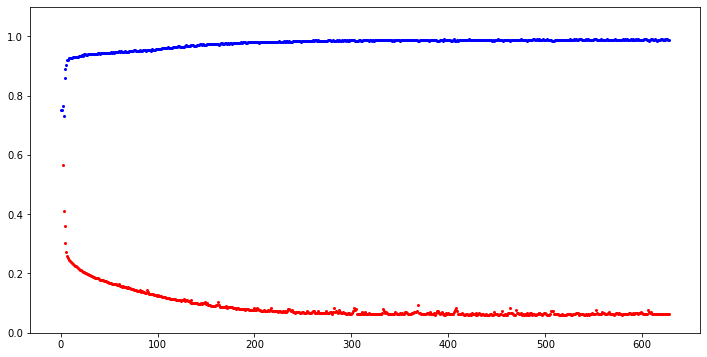

In [24]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.ylim(0.0, 1.1)
plt.plot(x_len, y_vloss, 'o', color='red', markersize = 2)
plt.plot(x_len, y_acc, 'o', color='blue', markersize = 2)
plt.show()